# Worksheet 19

Name:  Vishvakishore Venkatesan
UID: U99893219

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9957695648617368
0.9957869103122563
0.9957995452771241
0.9958003005954473
0.9958322886616743
0.9958324328737809
0.9958661121543678
0.9958695528025192
0.9958975012121091
0.9959306574165425
0.9959493336133799
0.995994493859077
0.9960038266969091
0.9960277922790584


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[0, 0, 1, 0, 1]
0.31249999999999983


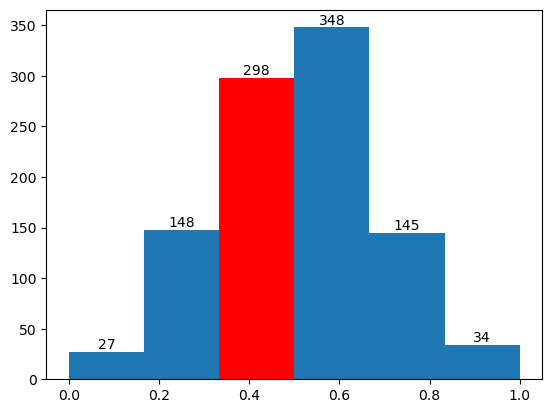

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

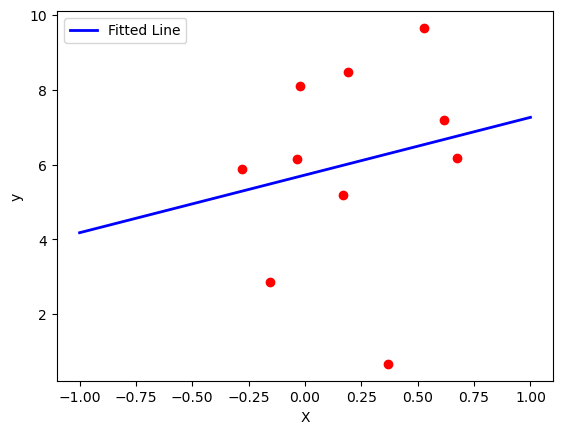

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # x between -1 and 1
y = 10 * np.random.random(SAMPLE_SIZE)  # random y between 0 and 10

X = xlin.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

beta = model.coef_[0]
intercept = model.intercept_

xplot = np.linspace(-1, 1, 20)
yestplot = intercept + beta * xplot

plt.plot(xplot, yestplot, 'b-', lw=2, label='Fitted Line')
plt.scatter(xlin, y, color='red', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

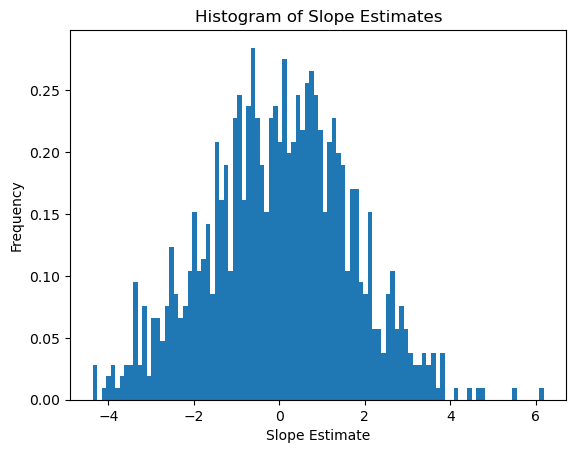

In [4]:
def generate_data_and_get_slope(sample_size):
    x = -1.0 + 2.0 * np.random.random(sample_size)
    y = 10 * np.random.random(sample_size)
    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

num_iterations = 1000
# slopes
beta_hist = [generate_data_and_get_slope(SAMPLE_SIZE) for _ in range(num_iterations)]

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.title('Histogram of Slope Estimates')
plt.xlabel('Slope Estimate')
plt.ylabel('Frequency')
plt.show()

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

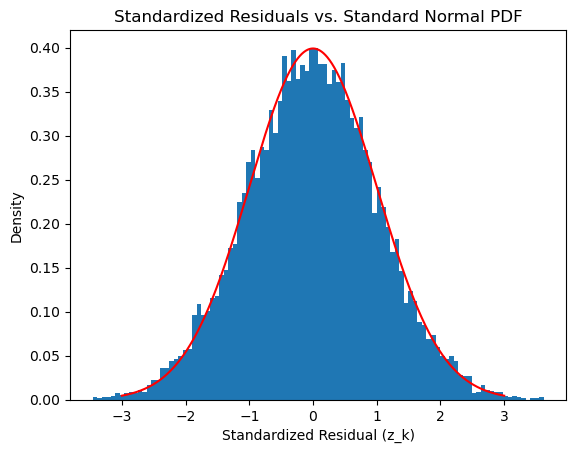

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

def generate_data_and_get_z(sample_size, beta_k, sigma_sq, S_kk):
    x = -1.0 + 2.0 * np.random.random(sample_size)  # x values between -1 and 1
    y = beta_k * x + np.random.normal(0, np.sqrt(sigma_sq), sample_size)  # linear relation with noise
    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    beta_hat_k = model.coef_[0]  # slope estimate
    z_k = (beta_hat_k - beta_k) / np.sqrt(sigma_sq * S_kk)
    return z_k

num_iterations = 10000
sample_size = 100
beta_k = 1  # true slope
sigma_sq = 1  # variance of error terms

# S_kk for slope
X_full = np.c_[np.ones((sample_size, 1)), np.linspace(-1, 1, sample_size).reshape(-1, 1)]
S_kk = np.linalg.inv(X_full.T @ X_full)[1, 1]

# Generate z values
z_hist = [generate_data_and_get_z(sample_size, beta_k, sigma_sq, S_kk) for _ in range(num_iterations)]

# Plotting
fig, ax = plt.subplots()
ax.hist(z_hist, bins=100, density=True)
xs = np.linspace(-3, 3, 1000)
ax.plot(xs, norm.pdf(xs), color='red')
ax.set_title('Standardized Residuals vs. Standard Normal PDF')
ax.set_xlabel('Standardized Residual (z_k)')
ax.set_ylabel('Density')
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

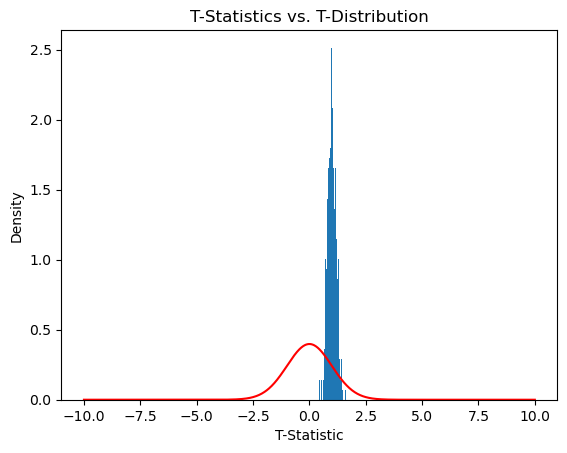

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

def standard_error(y_true, y_pred, p, n):
    rss = np.sum((y_true - y_pred) ** 2)
    return np.sqrt(rss / (n - p))

def simulate_and_calculate_t_statistic(sample_size, beta_k, sigma_sq, p):
    x = -1.0 + 2.0 * np.random.random(sample_size)
    y = beta_k * x + np.random.normal(0, np.sqrt(sigma_sq), sample_size)
    X = x.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    s = standard_error(y, y_pred, p, sample_size)
    t_stat = model.coef_[0] / s  # Assuming we're testing the slope

    return t_stat


num_iterations = 1000
sample_size = 100
beta_k = 1  # True slope
sigma_sq = 1  # variance of error terms
p = 2  # number of parameters (slope and intercept)

t_stats = [simulate_and_calculate_t_statistic(sample_size, beta_k, sigma_sq, p) for _ in range(num_iterations)]

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(t_stats, bins=100, density=True)
ax.plot(xs, t.pdf(xs, sample_size - p), color='red')
ax.set_title('T-Statistics vs. T-Distribution')
ax.set_xlabel('T-Statistic')
ax.set_ylabel('Density')
plt.show()


f) You are given the following dataset:

[0.50155603 1.19902827]


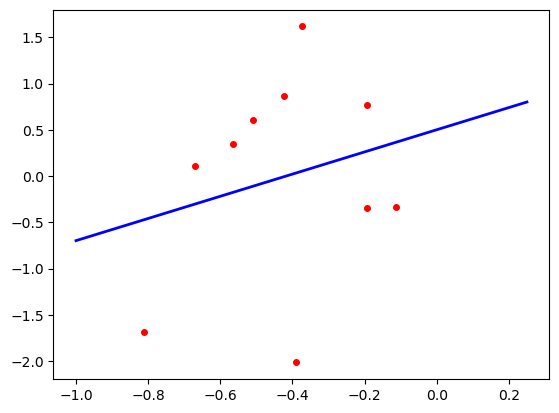

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [9]:
from scipy.stats import t

# compute beta_hat using least squares
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat_intercept = beta_hat[0]
beta_hat_slope = beta_hat[1]

# standard error for beta_hat_slope
n = len(x)  # number of observations
p = 2       # number of parameters (intercept and slope)
y_pred = X @ beta_hat
rss = np.sum((y - y_pred) ** 2)
s_squared = rss / (n - p)
S_xx = np.sum((x - np.mean(x)) ** 2)
se_slope = np.sqrt(s_squared / S_xx)

# t-statistic for the slope
t_statistic = beta_hat_slope / se_slope

# p-value
p_value = 2 * t.sf(np.abs(t_statistic), df=n-p)

print(f"Slope estimate: {beta_hat_slope}")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


Slope estimate: 1.19902827199062
t-statistic: 0.6842586696389726
p-value: 0.5131420720905752
